### imported Packages

In [1]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, make_scorer, accuracy_score, precision_score, average_precision_score, \
classification_report, recall_score, confusion_matrix, f1_score

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
data = pd.read_csv('Data/question2_new.csv')
data.dropna(inplace=True)
#data.set_index('year', inplace=True)
data.head()

,driverId,constructorId,year,circuitId,turns,lap_length,race_laps,race_distance,max_speed,drs_zone,full_throttle_percentage,longest_flatout_section,downforce_level,gear_changes_per_lap,fastest_q,prev_year_1_lap,prev_year_2_lap,prev_year_3_lap,prev_year_4_lap,fastestLapTime
0,1,1,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,85200,90900,101400,93100,90600,92000
1,9,2,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,85300,90900,101400,93100,90600,92000
2,5,1,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,85500,90900,101400,93100,90600,92000
3,13,6,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,85700,90900,101400,93100,90600,92000
4,2,2,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,85500,90900,101400,93100,90600,92000


In [4]:
data['fastest_q'] = data['fastest_q']/60000
data['prev_year_1_lap'] = data['prev_year_1_lap']/60000
data['prev_year_2_lap'] = data['prev_year_2_lap']/60000
data['prev_year_3_lap'] = data['prev_year_3_lap']/60000
data['prev_year_4_lap'] = data['prev_year_4_lap']/60000
data.head()

,driverId,constructorId,year,circuitId,turns,lap_length,race_laps,race_distance,max_speed,drs_zone,full_throttle_percentage,longest_flatout_section,downforce_level,gear_changes_per_lap,fastest_q,prev_year_1_lap,prev_year_2_lap,prev_year_3_lap,prev_year_4_lap,fastestLapTime
0,1,1,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,1.420000,1.515,1.69,1.551667,1.51,92000
1,9,2,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,1.421667,1.515,1.69,1.551667,1.51,92000
2,5,1,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,1.425000,1.515,1.69,1.551667,1.51,92000
3,13,6,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,1.428333,1.515,1.69,1.551667,1.51,92000
4,2,2,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,1.425000,1.515,1.69,1.551667,1.51,92000


In [5]:
target_df = data[['year','circuitId','fastestLapTime']]
target_df.head()

,year,circuitId,fastestLapTime
0,2008,1,92000
1,2008,1,92000
2,2008,1,92000
3,2008,1,92000
4,2008,1,92000


In [6]:
target_df = target_df.groupby(['year','circuitId']).mean()
target_df.head()

fastestLapTime
year circuitId                
2008 1                   92000
     2                  100300
     3                   96100
     4                   86900
     6                  102100

In [7]:
target_df = target_df.reset_index()
target_df.head()

,year,circuitId,fastestLapTime
0,2008,1,92000
1,2008,2,100300
2,2008,3,96100
3,2008,4,86900
4,2008,6,102100


In [8]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
year              125 non-null int64
circuitId         125 non-null int64
fastestLapTime    125 non-null int64
dtypes: int64(3)
memory usage: 3.1 KB


In [9]:
data.drop(['fastestLapTime'], 1, inplace=True)
data.head()

,driverId,constructorId,year,circuitId,turns,lap_length,race_laps,race_distance,max_speed,drs_zone,full_throttle_percentage,longest_flatout_section,downforce_level,gear_changes_per_lap,fastest_q,prev_year_1_lap,prev_year_2_lap,prev_year_3_lap,prev_year_4_lap
0,1,1,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,1.420000,1.515,1.69,1.551667,1.51
1,9,2,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,1.421667,1.515,1.69,1.551667,1.51
2,5,1,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,1.425000,1.515,1.69,1.551667,1.51
3,13,6,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,1.428333,1.515,1.69,1.551667,1.51
4,2,2,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,1.425000,1.515,1.69,1.551667,1.51


In [10]:
data.drop(['driverId','constructorId'], 1, inplace=True)
data_groupby = data.groupby(['year','circuitId']).mean()
data_groupby.head()

turns  lap_length  race_laps  race_distance  max_speed  \
year circuitId                                                           
2008 1             16       5.303         58        307.574      321.1   
     2             15       5.543         56        310.408      329.0   
     3             15       5.412         57        308.238      329.6   
     4             16       4.655         66        307.104      332.0   
     6             19       3.337         78        260.286      290.0   

                drs_zone  full_throttle_percentage  longest_flatout_section  \
year circuitId                                                                
2008 1                 2                      0.77                      843   
     2                 2                      0.45                     1029   
     3                 2                      0.72                     1205   
     4                 2                      0.72                     1310   
     6                 1                      0.34                      669   

                downforce_level  gear_changes_per_lap  fastest_q  \
year circuitId                                                     
2008 1                        3                    46   1.442197   
     2                        3                    40   1.592121   
     3                        2                    56   1.545303   
     4                        3                    45   1.357273   
     6                        3                    47   1.268083   

                prev_year_1_lap  prev_year_2_lap  prev_year_3_lap  \
year circuitId                                                      
2008 1                 1.515000         1.690000         1.551667   
     2                 1.691667         1.713333         1.726667   
     3                 1.620000         1.638333         1.625000   
     4                 1.438333         1.373333         1.348333   
     6                 1.316667         1.318333         1.366667   

                prev_year_4_lap  
year circuitId                   
2008 1                 1.510000  
     2                 1.668333  
     3                 1.585000  
     4                 1.390000  
     6                 1.365000

In [11]:
data_groupby = data_groupby.reset_index()
data_groupby.head()

,year,circuitId,turns,lap_length,race_laps,race_distance,max_speed,drs_zone,full_throttle_percentage,longest_flatout_section,downforce_level,gear_changes_per_lap,fastest_q,prev_year_1_lap,prev_year_2_lap,prev_year_3_lap,prev_year_4_lap
0,2008,1,16,5.303,58,307.574,321.1,2,0.77,843,3,46,1.442197,1.515000,1.690000,1.551667,1.510000
1,2008,2,15,5.543,56,310.408,329.0,2,0.45,1029,3,40,1.592121,1.691667,1.713333,1.726667,1.668333
2,2008,3,15,5.412,57,308.238,329.6,2,0.72,1205,2,56,1.545303,1.620000,1.638333,1.625000,1.585000
3,2008,4,16,4.655,66,307.104,332.0,2,0.72,1310,3,45,1.357273,1.438333,1.373333,1.348333,1.390000
4,2008,6,19,3.337,78,260.286,290.0,1,0.34,669,3,47,1.268083,1.316667,1.318333,1.366667,1.365000


In [12]:
data_groupby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 17 columns):
year                        125 non-null int64
circuitId                   125 non-null int64
turns                       125 non-null int64
lap_length                  125 non-null float64
race_laps                   125 non-null int64
race_distance               125 non-null float64
max_speed                   125 non-null float64
drs_zone                    125 non-null int64
full_throttle_percentage    125 non-null float64
longest_flatout_section     125 non-null int64
downforce_level             125 non-null int64
gear_changes_per_lap        125 non-null int64
fastest_q                   125 non-null float64
prev_year_1_lap             125 non-null float64
prev_year_2_lap             125 non-null float64
prev_year_3_lap             125 non-null float64
prev_year_4_lap             125 non-null float64
dtypes: float64(9), int64(8)
memory usage: 16.7 KB


In [13]:
year_circuit_df = data_groupby[['year','circuitId']]
data_groupby.drop(['year','circuitId'], 1, inplace=True)
year_circuit_df.head()

,year,circuitId
0,2008,1
1,2008,2
2,2008,3
3,2008,4
4,2008,6


In [14]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_groupby)
data_groupby = pd.DataFrame(x_scaled, columns = data_groupby.columns, index=data_groupby.index)
data_groupby.head()

,turns,lap_length,race_laps,race_distance,max_speed,drs_zone,full_throttle_percentage,longest_flatout_section,downforce_level,gear_changes_per_lap,fastest_q,prev_year_1_lap,prev_year_2_lap,prev_year_3_lap,prev_year_4_lap
0,0.357143,0.536133,0.411765,0.943458,0.785130,0.5,0.86,0.129272,1.0,0.428571,0.279327,0.156281,0.260138,0.178042,0.153314
1,0.285714,0.601582,0.352941,1.000000,0.843866,0.5,0.22,0.267459,1.0,0.285714,0.429123,0.261128,0.273986,0.281899,0.247280
2,0.285714,0.565858,0.382353,0.956706,0.848327,0.5,0.76,0.398217,0.5,0.666667,0.382345,0.218595,0.229476,0.221563,0.197824
3,0.357143,0.359422,0.647059,0.934081,0.866171,0.5,0.76,0.476226,1.0,0.404762,0.194475,0.110781,0.072206,0.057369,0.082097
4,0.571429,0.000000,1.000000,0.000000,0.553903,0.0,0.00,0.000000,1.0,0.452381,0.105362,0.038576,0.039565,0.068249,0.067260


In [15]:
data_groupby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 15 columns):
turns                       125 non-null float64
lap_length                  125 non-null float64
race_laps                   125 non-null float64
race_distance               125 non-null float64
max_speed                   125 non-null float64
drs_zone                    125 non-null float64
full_throttle_percentage    125 non-null float64
longest_flatout_section     125 non-null float64
downforce_level             125 non-null float64
gear_changes_per_lap        125 non-null float64
fastest_q                   125 non-null float64
prev_year_1_lap             125 non-null float64
prev_year_2_lap             125 non-null float64
prev_year_3_lap             125 non-null float64
prev_year_4_lap             125 non-null float64
dtypes: float64(15)
memory usage: 14.8 KB


In [16]:
sequential_data = []

for i in data_groupby.values:
    arr = np.array([n for n in i])
    sequential_data.append(arr)

In [17]:
target_values=target_df['fastestLapTime'].values/60000

In [18]:
X = sequential_data
y = target_values

In [19]:
X  = np.array(X).reshape(125,15)
y = np.array(y).reshape(125,1)

In [20]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size = 0.25,
                                                                    random_state=10)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(93, 15) (93, 1)
(32, 15) (32, 1)


In [21]:
histories={}

np.random.seed(10)
tf.random.set_seed(10)

l2 = tf.keras.regularizers.l2(1e-3)

print(l2)

# create a network
model = Sequential([
        Dense(10, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(10, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(1)
])

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['qn1'] = model.fit(X_train, y_train,
                             epochs=500,
                             batch_size=4,
                             verbose = 2,
                             validation_data=(X_test, y_test))

Epoch 1/500
24/24 - 0s - loss: 0.8357 - mse: 0.8153 - val_loss: 0.2882 - val_mse: 0.2680
Epoch 2/500
24/24 - 0s - loss: 0.6420 - mse: 0.6220 - val_loss: 0.3243 - val_mse: 0.3046
Epoch 3/500
24/24 - 0s - loss: 0.6366 - mse: 0.6170 - val_loss: 0.3370 - val_mse: 0.3176
Epoch 4/500
24/24 - 0s - loss: 0.6632 - mse: 0.6439 - val_loss: 0.2405 - val_mse: 0.2214
Epoch 5/500
24/24 - 0s - loss: 0.5857 - mse: 0.5666 - val_loss: 0.2166 - val_mse: 0.1977
Epoch 6/500
24/24 - 0s - loss: 0.4983 - mse: 0.4794 - val_loss: 0.1906 - val_mse: 0.1718
Epoch 7/500
24/24 - 0s - loss: 0.5139 - mse: 0.4952 - val_loss: 0.2169 - val_mse: 0.1984
Epoch 8/500
24/24 - 0s - loss: 0.5251 - mse: 0.5067 - val_loss: 0.2480 - val_mse: 0.2297
Epoch 9/500
24/24 - 0s - loss: 0.3527 - mse: 0.3345 - val_loss: 0.2018 - val_mse: 0.1836
Epoch 10/500
24/24 - 0s - loss: 0.3855 - mse: 0.3674 - val_loss: 0.2285 - val_mse: 0.2105
Epoch 11/500
24/24 - 0s - loss: 0.3829 - mse: 0.3649 - val_loss: 0.2008 - val_mse: 0.1829
Epoch 12/500
24/24 

Epoch 92/500
24/24 - 0s - loss: 0.1153 - mse: 0.1024 - val_loss: 0.0865 - val_mse: 0.0736
Epoch 93/500
24/24 - 0s - loss: 0.1069 - mse: 0.0940 - val_loss: 0.0797 - val_mse: 0.0668
Epoch 94/500
24/24 - 0s - loss: 0.1240 - mse: 0.1111 - val_loss: 0.0803 - val_mse: 0.0674
Epoch 95/500
24/24 - 0s - loss: 0.1346 - mse: 0.1218 - val_loss: 0.0968 - val_mse: 0.0840
Epoch 96/500
24/24 - 0s - loss: 0.1224 - mse: 0.1097 - val_loss: 0.0877 - val_mse: 0.0750
Epoch 97/500
24/24 - 0s - loss: 0.1111 - mse: 0.0985 - val_loss: 0.0866 - val_mse: 0.0739
Epoch 98/500
24/24 - 0s - loss: 0.1173 - mse: 0.1047 - val_loss: 0.0873 - val_mse: 0.0746
Epoch 99/500
24/24 - 0s - loss: 0.0980 - mse: 0.0854 - val_loss: 0.0830 - val_mse: 0.0704
Epoch 100/500
24/24 - 0s - loss: 0.1167 - mse: 0.1041 - val_loss: 0.0815 - val_mse: 0.0689
Epoch 101/500
24/24 - 0s - loss: 0.1108 - mse: 0.0982 - val_loss: 0.0802 - val_mse: 0.0677
Epoch 102/500
24/24 - 0s - loss: 0.1322 - mse: 0.1197 - val_loss: 0.0808 - val_mse: 0.0683
Epoch 1

24/24 - 0s - loss: 0.0666 - mse: 0.0569 - val_loss: 0.0782 - val_mse: 0.0685
Epoch 183/500
24/24 - 0s - loss: 0.0783 - mse: 0.0686 - val_loss: 0.0803 - val_mse: 0.0707
Epoch 184/500
24/24 - 0s - loss: 0.0761 - mse: 0.0664 - val_loss: 0.0793 - val_mse: 0.0696
Epoch 185/500
24/24 - 0s - loss: 0.0803 - mse: 0.0707 - val_loss: 0.0758 - val_mse: 0.0661
Epoch 186/500
24/24 - 0s - loss: 0.0855 - mse: 0.0759 - val_loss: 0.0793 - val_mse: 0.0697
Epoch 187/500
24/24 - 0s - loss: 0.0858 - mse: 0.0763 - val_loss: 0.0776 - val_mse: 0.0680
Epoch 188/500
24/24 - 0s - loss: 0.0729 - mse: 0.0633 - val_loss: 0.0776 - val_mse: 0.0680
Epoch 189/500
24/24 - 0s - loss: 0.0807 - mse: 0.0712 - val_loss: 0.0760 - val_mse: 0.0664
Epoch 190/500
24/24 - 0s - loss: 0.0837 - mse: 0.0741 - val_loss: 0.0760 - val_mse: 0.0665
Epoch 191/500
24/24 - 0s - loss: 0.0902 - mse: 0.0807 - val_loss: 0.0767 - val_mse: 0.0672
Epoch 192/500
24/24 - 0s - loss: 0.0713 - mse: 0.0619 - val_loss: 0.0764 - val_mse: 0.0670
Epoch 193/500

Epoch 273/500
24/24 - 0s - loss: 0.0685 - mse: 0.0605 - val_loss: 0.0760 - val_mse: 0.0681
Epoch 274/500
24/24 - 0s - loss: 0.0637 - mse: 0.0558 - val_loss: 0.0761 - val_mse: 0.0682
Epoch 275/500
24/24 - 0s - loss: 0.0687 - mse: 0.0608 - val_loss: 0.0741 - val_mse: 0.0662
Epoch 276/500
24/24 - 0s - loss: 0.0639 - mse: 0.0560 - val_loss: 0.0746 - val_mse: 0.0667
Epoch 277/500
24/24 - 0s - loss: 0.0751 - mse: 0.0672 - val_loss: 0.0729 - val_mse: 0.0650
Epoch 278/500
24/24 - 0s - loss: 0.0714 - mse: 0.0636 - val_loss: 0.0736 - val_mse: 0.0658
Epoch 279/500
24/24 - 0s - loss: 0.0686 - mse: 0.0608 - val_loss: 0.0739 - val_mse: 0.0661
Epoch 280/500
24/24 - 0s - loss: 0.0717 - mse: 0.0640 - val_loss: 0.0746 - val_mse: 0.0669
Epoch 281/500
24/24 - 0s - loss: 0.0790 - mse: 0.0713 - val_loss: 0.0757 - val_mse: 0.0679
Epoch 282/500
24/24 - 0s - loss: 0.0690 - mse: 0.0613 - val_loss: 0.0696 - val_mse: 0.0618
Epoch 283/500
24/24 - 0s - loss: 0.0699 - mse: 0.0621 - val_loss: 0.0728 - val_mse: 0.0651

24/24 - 0s - loss: 0.0677 - mse: 0.0610 - val_loss: 0.0749 - val_mse: 0.0682
Epoch 364/500
24/24 - 0s - loss: 0.0623 - mse: 0.0557 - val_loss: 0.0691 - val_mse: 0.0625
Epoch 365/500
24/24 - 0s - loss: 0.0512 - mse: 0.0445 - val_loss: 0.0706 - val_mse: 0.0640
Epoch 366/500
24/24 - 0s - loss: 0.0665 - mse: 0.0598 - val_loss: 0.0711 - val_mse: 0.0645
Epoch 367/500
24/24 - 0s - loss: 0.0601 - mse: 0.0535 - val_loss: 0.0705 - val_mse: 0.0639
Epoch 368/500
24/24 - 0s - loss: 0.0679 - mse: 0.0613 - val_loss: 0.0698 - val_mse: 0.0631
Epoch 369/500
24/24 - 0s - loss: 0.0666 - mse: 0.0600 - val_loss: 0.0721 - val_mse: 0.0655
Epoch 370/500
24/24 - 0s - loss: 0.0602 - mse: 0.0536 - val_loss: 0.0715 - val_mse: 0.0650
Epoch 371/500
24/24 - 0s - loss: 0.0496 - mse: 0.0430 - val_loss: 0.0709 - val_mse: 0.0643
Epoch 372/500
24/24 - 0s - loss: 0.0580 - mse: 0.0514 - val_loss: 0.0707 - val_mse: 0.0641
Epoch 373/500
24/24 - 0s - loss: 0.0630 - mse: 0.0565 - val_loss: 0.0727 - val_mse: 0.0662
Epoch 374/500

Epoch 454/500
24/24 - 0s - loss: 0.0465 - mse: 0.0409 - val_loss: 0.0704 - val_mse: 0.0648
Epoch 455/500
24/24 - 0s - loss: 0.0587 - mse: 0.0531 - val_loss: 0.0692 - val_mse: 0.0636
Epoch 456/500
24/24 - 0s - loss: 0.0598 - mse: 0.0542 - val_loss: 0.0700 - val_mse: 0.0644
Epoch 457/500
24/24 - 0s - loss: 0.0663 - mse: 0.0607 - val_loss: 0.0708 - val_mse: 0.0652
Epoch 458/500
24/24 - 0s - loss: 0.0597 - mse: 0.0541 - val_loss: 0.0703 - val_mse: 0.0647
Epoch 459/500
24/24 - 0s - loss: 0.0623 - mse: 0.0567 - val_loss: 0.0721 - val_mse: 0.0665
Epoch 460/500
24/24 - 0s - loss: 0.0652 - mse: 0.0596 - val_loss: 0.0708 - val_mse: 0.0652
Epoch 461/500
24/24 - 0s - loss: 0.0565 - mse: 0.0510 - val_loss: 0.0702 - val_mse: 0.0646
Epoch 462/500
24/24 - 0s - loss: 0.0522 - mse: 0.0466 - val_loss: 0.0680 - val_mse: 0.0623
Epoch 463/500
24/24 - 0s - loss: 0.0602 - mse: 0.0546 - val_loss: 0.0694 - val_mse: 0.0638
Epoch 464/500
24/24 - 0s - loss: 0.0612 - mse: 0.0556 - val_loss: 0.0731 - val_mse: 0.0675

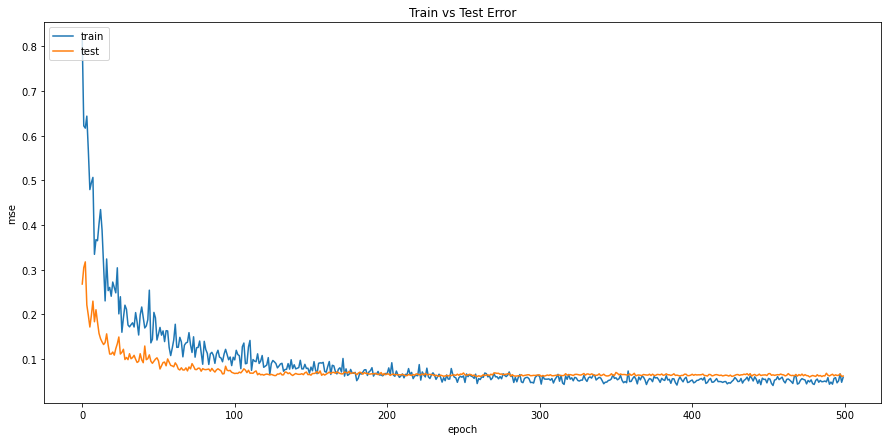

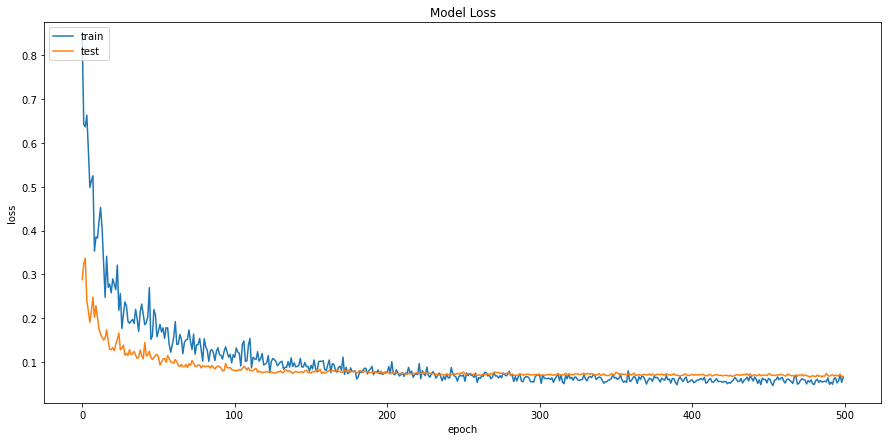

In [22]:
plt.figure(figsize=(15,7))
plt.plot(histories['qn1'].history['mse'])
plt.plot(histories['qn1'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(15,7))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
predictions = model.predict(X_test)

In [24]:
df = pd.DataFrame()
df['predicted'] = predictions.flatten()
df['actual'] = y_test

In [25]:
df

,predicted,actual
0,2.072193,1.955000
1,1.743396,2.141667
2,1.716256,2.173333
3,1.900857,1.885000
4,1.467677,1.286667
5,1.492841,1.331667
6,1.537760,1.533333
7,1.520475,1.523333
8,1.528443,1.346667
9,1.559143,1.378333


In [26]:
count = 0

for i in range(0,len(predictions)):
  if(abs(predictions[i]-y_test[i])<=0.2):
    count += 1

print("number of predictions within acceptable range: " + str(count))
print("percentage of predictions within acceptable range: " + str((count/32)*100) + "%")

number of predictions within acceptable range: 24
percentage of predictions within acceptable range: 75.0%


## Question 2 with Reduced Features Dataset

In [27]:
from sklearn.feature_selection import SelectKBest, f_regression

X_new = SelectKBest(f_regression, k=8).fit_transform(X, y)
print(X_new.shape)
sec = SelectKBest(f_regression, k=8).fit(X, y)
selected = sec.get_support()
print("Selected features: ")
features = ['turns','lap_length','race_laps','race_distance','max_speed','drs_zone','full_throttle_percentage','longest_flatout_section','downforce_level','gear_changes_per_lap','fastest_q','prev_year_1_lap','prev_year_2_lap','prev_year_3_lap','prev_year_4_lap']
for i in range(0,len(selected)):
  if(selected[i]==True):
    print(features[i])

(125, 8)
Selected features: 
turns
lap_length
race_laps
fastest_q
prev_year_1_lap
prev_year_2_lap
prev_year_3_lap
prev_year_4_lap


C:\Users\Shearman Chua\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Shearman Chua\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new,
                                                                    y,
                                                                    test_size = 0.25,
                                                                    random_state=10)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(93, 8) (93, 1)
(32, 8) (32, 1)


In [29]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

histories={}

np.random.seed(10)
tf.random.set_seed(10)

l2 = tf.keras.regularizers.l2(1e-3)

print(l2)

# create a network
model = Sequential([
        Dense(10, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(10, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(1)
])

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['qn1'] = model.fit(X_train, y_train,
                             epochs=500,
                             batch_size=4,
                             verbose = 2,
                             validation_data=(X_test, y_test))

Epoch 1/500
24/24 - 0s - loss: 1.1970 - mse: 1.1791 - val_loss: 0.6681 - val_mse: 0.6503
Epoch 2/500
24/24 - 0s - loss: 0.6290 - mse: 0.6113 - val_loss: 0.4035 - val_mse: 0.3860
Epoch 3/500
24/24 - 0s - loss: 0.6785 - mse: 0.6611 - val_loss: 0.3152 - val_mse: 0.2979
Epoch 4/500
24/24 - 0s - loss: 0.6113 - mse: 0.5942 - val_loss: 0.2475 - val_mse: 0.2305
Epoch 5/500
24/24 - 0s - loss: 0.6068 - mse: 0.5899 - val_loss: 0.2252 - val_mse: 0.2084
Epoch 6/500
24/24 - 0s - loss: 0.4616 - mse: 0.4450 - val_loss: 0.1938 - val_mse: 0.1773
Epoch 7/500
24/24 - 0s - loss: 0.5163 - mse: 0.4999 - val_loss: 0.1865 - val_mse: 0.1703
Epoch 8/500
24/24 - 0s - loss: 0.5830 - mse: 0.5669 - val_loss: 0.1960 - val_mse: 0.1801
Epoch 9/500
24/24 - 0s - loss: 0.3599 - mse: 0.3440 - val_loss: 0.1685 - val_mse: 0.1528
Epoch 10/500
24/24 - 0s - loss: 0.4459 - mse: 0.4303 - val_loss: 0.1710 - val_mse: 0.1555
Epoch 11/500
24/24 - 0s - loss: 0.3551 - mse: 0.3397 - val_loss: 0.1563 - val_mse: 0.1410
Epoch 12/500
24/24 

Epoch 92/500
24/24 - 0s - loss: 0.1156 - mse: 0.1062 - val_loss: 0.0762 - val_mse: 0.0668
Epoch 93/500
24/24 - 0s - loss: 0.1040 - mse: 0.0946 - val_loss: 0.0717 - val_mse: 0.0622
Epoch 94/500
24/24 - 0s - loss: 0.1373 - mse: 0.1278 - val_loss: 0.0710 - val_mse: 0.0616
Epoch 95/500
24/24 - 0s - loss: 0.1294 - mse: 0.1200 - val_loss: 0.0767 - val_mse: 0.0674
Epoch 96/500
24/24 - 0s - loss: 0.1201 - mse: 0.1108 - val_loss: 0.0803 - val_mse: 0.0710
Epoch 97/500
24/24 - 0s - loss: 0.1158 - mse: 0.1065 - val_loss: 0.0772 - val_mse: 0.0679
Epoch 98/500
24/24 - 0s - loss: 0.1200 - mse: 0.1108 - val_loss: 0.0749 - val_mse: 0.0656
Epoch 99/500
24/24 - 0s - loss: 0.1008 - mse: 0.0916 - val_loss: 0.0733 - val_mse: 0.0640
Epoch 100/500
24/24 - 0s - loss: 0.1058 - mse: 0.0966 - val_loss: 0.0728 - val_mse: 0.0636
Epoch 101/500
24/24 - 0s - loss: 0.1114 - mse: 0.1022 - val_loss: 0.0717 - val_mse: 0.0625
Epoch 102/500
24/24 - 0s - loss: 0.1187 - mse: 0.1096 - val_loss: 0.0708 - val_mse: 0.0617
Epoch 1

24/24 - 0s - loss: 0.0666 - mse: 0.0594 - val_loss: 0.0718 - val_mse: 0.0647
Epoch 183/500
24/24 - 0s - loss: 0.0773 - mse: 0.0701 - val_loss: 0.0726 - val_mse: 0.0655
Epoch 184/500
24/24 - 0s - loss: 0.0796 - mse: 0.0724 - val_loss: 0.0718 - val_mse: 0.0646
Epoch 185/500
24/24 - 0s - loss: 0.0762 - mse: 0.0691 - val_loss: 0.0710 - val_mse: 0.0638
Epoch 186/500
24/24 - 0s - loss: 0.0884 - mse: 0.0813 - val_loss: 0.0723 - val_mse: 0.0652
Epoch 187/500
24/24 - 0s - loss: 0.0915 - mse: 0.0844 - val_loss: 0.0724 - val_mse: 0.0653
Epoch 188/500
24/24 - 0s - loss: 0.0746 - mse: 0.0675 - val_loss: 0.0731 - val_mse: 0.0660
Epoch 189/500
24/24 - 0s - loss: 0.0814 - mse: 0.0743 - val_loss: 0.0719 - val_mse: 0.0648
Epoch 190/500
24/24 - 0s - loss: 0.0837 - mse: 0.0766 - val_loss: 0.0706 - val_mse: 0.0634
Epoch 191/500
24/24 - 0s - loss: 0.0858 - mse: 0.0787 - val_loss: 0.0709 - val_mse: 0.0638
Epoch 192/500
24/24 - 0s - loss: 0.0768 - mse: 0.0697 - val_loss: 0.0707 - val_mse: 0.0636
Epoch 193/500

Epoch 273/500
24/24 - 0s - loss: 0.0814 - mse: 0.0754 - val_loss: 0.0679 - val_mse: 0.0620
Epoch 274/500
24/24 - 0s - loss: 0.0686 - mse: 0.0626 - val_loss: 0.0681 - val_mse: 0.0621
Epoch 275/500
24/24 - 0s - loss: 0.0676 - mse: 0.0617 - val_loss: 0.0687 - val_mse: 0.0628
Epoch 276/500
24/24 - 0s - loss: 0.0714 - mse: 0.0654 - val_loss: 0.0685 - val_mse: 0.0625
Epoch 277/500
24/24 - 0s - loss: 0.0739 - mse: 0.0680 - val_loss: 0.0687 - val_mse: 0.0628
Epoch 278/500
24/24 - 0s - loss: 0.0701 - mse: 0.0642 - val_loss: 0.0686 - val_mse: 0.0627
Epoch 279/500
24/24 - 0s - loss: 0.0775 - mse: 0.0716 - val_loss: 0.0688 - val_mse: 0.0629
Epoch 280/500
24/24 - 0s - loss: 0.0764 - mse: 0.0706 - val_loss: 0.0700 - val_mse: 0.0642
Epoch 281/500
24/24 - 0s - loss: 0.0856 - mse: 0.0798 - val_loss: 0.0696 - val_mse: 0.0638
Epoch 282/500
24/24 - 0s - loss: 0.0708 - mse: 0.0649 - val_loss: 0.0673 - val_mse: 0.0614
Epoch 283/500
24/24 - 0s - loss: 0.0691 - mse: 0.0632 - val_loss: 0.0683 - val_mse: 0.0625

24/24 - 0s - loss: 0.0631 - mse: 0.0580 - val_loss: 0.0677 - val_mse: 0.0626
Epoch 364/500
24/24 - 0s - loss: 0.0672 - mse: 0.0621 - val_loss: 0.0654 - val_mse: 0.0602
Epoch 365/500
24/24 - 0s - loss: 0.0523 - mse: 0.0472 - val_loss: 0.0652 - val_mse: 0.0600
Epoch 366/500
24/24 - 0s - loss: 0.0655 - mse: 0.0603 - val_loss: 0.0651 - val_mse: 0.0599
Epoch 367/500
24/24 - 0s - loss: 0.0633 - mse: 0.0582 - val_loss: 0.0647 - val_mse: 0.0595
Epoch 368/500
24/24 - 0s - loss: 0.0663 - mse: 0.0611 - val_loss: 0.0643 - val_mse: 0.0591
Epoch 369/500
24/24 - 0s - loss: 0.0681 - mse: 0.0629 - val_loss: 0.0658 - val_mse: 0.0607
Epoch 370/500
24/24 - 0s - loss: 0.0621 - mse: 0.0570 - val_loss: 0.0655 - val_mse: 0.0604
Epoch 371/500
24/24 - 0s - loss: 0.0536 - mse: 0.0485 - val_loss: 0.0645 - val_mse: 0.0594
Epoch 372/500
24/24 - 0s - loss: 0.0573 - mse: 0.0521 - val_loss: 0.0644 - val_mse: 0.0592
Epoch 373/500
24/24 - 0s - loss: 0.0628 - mse: 0.0577 - val_loss: 0.0641 - val_mse: 0.0590
Epoch 374/500

Epoch 454/500
24/24 - 0s - loss: 0.0496 - mse: 0.0448 - val_loss: 0.0651 - val_mse: 0.0603
Epoch 455/500
24/24 - 0s - loss: 0.0658 - mse: 0.0610 - val_loss: 0.0648 - val_mse: 0.0600
Epoch 456/500
24/24 - 0s - loss: 0.0591 - mse: 0.0543 - val_loss: 0.0648 - val_mse: 0.0600
Epoch 457/500
24/24 - 0s - loss: 0.0624 - mse: 0.0576 - val_loss: 0.0643 - val_mse: 0.0594
Epoch 458/500
24/24 - 0s - loss: 0.0552 - mse: 0.0504 - val_loss: 0.0643 - val_mse: 0.0595
Epoch 459/500
24/24 - 0s - loss: 0.0686 - mse: 0.0637 - val_loss: 0.0652 - val_mse: 0.0604
Epoch 460/500
24/24 - 0s - loss: 0.0654 - mse: 0.0605 - val_loss: 0.0646 - val_mse: 0.0597
Epoch 461/500
24/24 - 0s - loss: 0.0522 - mse: 0.0474 - val_loss: 0.0642 - val_mse: 0.0593
Epoch 462/500
24/24 - 0s - loss: 0.0593 - mse: 0.0544 - val_loss: 0.0638 - val_mse: 0.0590
Epoch 463/500
24/24 - 0s - loss: 0.0569 - mse: 0.0521 - val_loss: 0.0637 - val_mse: 0.0589
Epoch 464/500
24/24 - 0s - loss: 0.0620 - mse: 0.0572 - val_loss: 0.0642 - val_mse: 0.0594

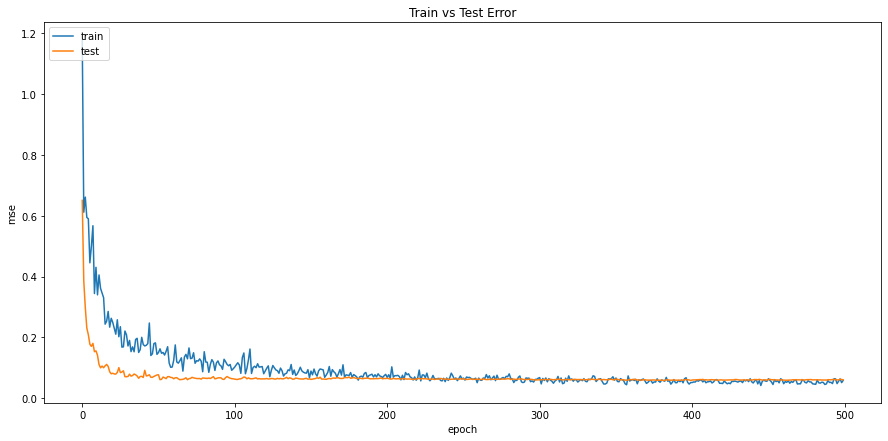

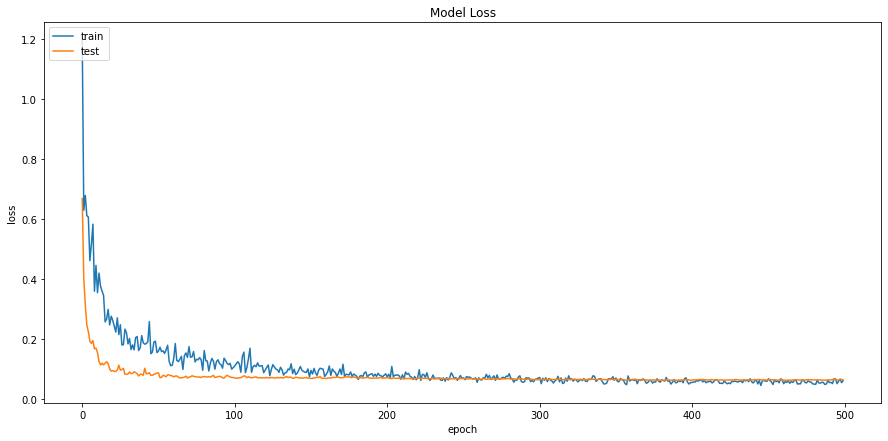

In [30]:
plt.figure(figsize=(15,7))
plt.plot(histories['qn1'].history['mse'])
plt.plot(histories['qn1'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(15,7))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
predictions = model.predict(X_test)

In [32]:
count = 0

for i in range(0,len(predictions)):
  if(abs(predictions[i]-y_test[i])<=0.2):
    count += 1

print(count)

24


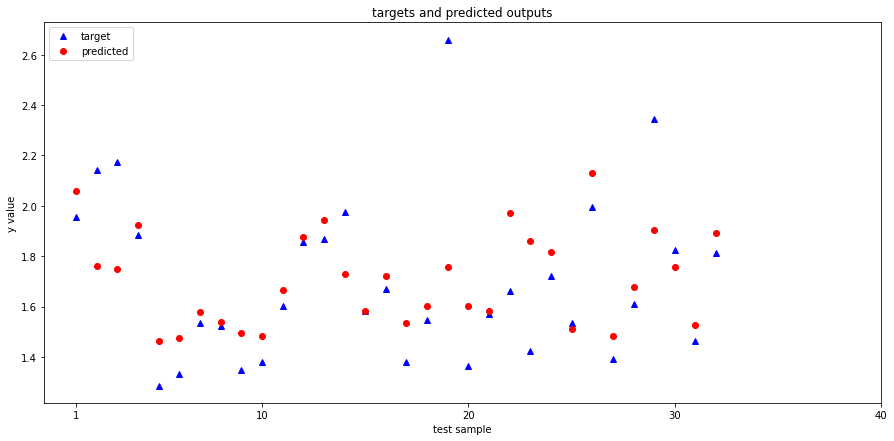

In [33]:
plt.figure(figsize=(15,7))
for i in range(0,32):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, predictions[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

In [34]:
df = pd.DataFrame()
df['predicted'] = predictions.flatten()
df['actual'] = y_test
df

,predicted,actual
0,2.057255,1.955000
1,1.759929,2.141667
2,1.751159,2.173333
3,1.923391,1.885000
4,1.465129,1.286667
5,1.473523,1.331667
6,1.576949,1.533333
7,1.539563,1.523333
8,1.496483,1.346667
9,1.485026,1.378333


In [35]:
count = 0

for i in range(0,len(predictions)):
  if(abs(predictions[i]-y_test[i])<=0.2):
    count += 1

print("number of predictions within acceptable range: " + str(count))
print("percentage of predictions within acceptable range: " + str((count/32)*100) + "%")

number of predictions within acceptable range: 24
percentage of predictions within acceptable range: 75.0%
